# σ / β Heatmap

In [1]:
using CSV
using DataFrames
using Plots
using Glob
using StatsBase: mean

include("../src/SimPlot.jl")
using Main.SimPlot: COLOR_MAP, get_value

In [2]:
function load(csv_file_names::Vector{String})::DataFrame
    df_vec = [CSV.File("../output/$(csv_file_name).csv") |> DataFrame for csv_file_name in csv_file_names]
    df = vcat(df_vec...)

    return df
end

function transform(df::DataFrame, keys::Vector{String})
    df = combine(groupby(df, keys), :cooperation_rate => mean => :cooperation_rate, :cooperation_rate => length => :count)
    
    println("nrow: $(nrow(df)), max: $(maximum(df.count)), mean: $(round(mean(df.count), digits=3)), min: $(minimum(df.count))")
    
    return sort(df, [:variability_mode, :β, :σ, :initial_T, :S])
end

function plot_σβ_heatmap(df::AbstractDataFrame, title::String, xlims, xticks)::Plots.Plot
    β = sort(unique(df.β))
    σ = sort(unique(df.σ))

    return heatmap(
        σ,
        β,
        reshape([get_value(df, s, b, :σ, :β, :cooperation_rate) for b in β, s in σ], length(β), length(σ)),
        xlabel = "σ",
        ylabel = "β",
        xlims = xlims,
        ylims = (-0.05, 0.95),
        xticks = xticks,
        yticks = 0:0.1:0.9,
        clims = (0.05, 0.95),
        title = title,
        color = COLOR_MAP,
    )
end;

In [3]:
df = load([
    # "20240204_110021", # (1.8,-0.8), POPULATION
    # "20240204_172737", # (1.8,-0.8), PAYOFF
    # "20240205_103712", # (1.7,-0.7), PAYOFF
    # "20240205_103849", # (1.7,-0.7), POPULATION
        "20240213_170409",
        "20240213_220102",
        "20240214_035250",
        "20240214_070736",
        "20240214_070745",
        "20240214_030043",
        "20240214_030112",
])
df = transform(df, names(df)[1:15])

nrow: 92, max: 17, mean: 4.543, min: 1


Row,initial_N,initial_k,initial_T,S,initial_w,Δw,reproduction_rate,δ,initial_μ_s,initial_μ_r,β,σ,τ,generations,variability_mode,cooperation_rate,count
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,String15,Float64,Int64
1,1000,999,1.15,-0.15,0.2,0.05,0.05,1.0,0.01,0.01,0.0,0.0,10,10000,POPULATION,0.150327,9
2,1000,999,1.15,-0.15,0.2,0.05,0.05,1.0,0.01,0.01,0.0,20.0,10,10000,POPULATION,0.378655,2
3,1000,999,1.15,-0.15,0.2,0.05,0.05,1.0,0.01,0.01,0.0,40.0,10,10000,POPULATION,0.14641,5
4,1000,999,1.15,-0.15,0.2,0.05,0.05,1.0,0.01,0.01,0.0,60.0,10,10000,POPULATION,0.04986,3
5,1000,999,1.15,-0.15,0.2,0.05,0.05,1.0,0.01,0.01,0.0,80.0,10,10000,POPULATION,0.159033,15
6,1000,999,1.15,-0.15,0.2,0.05,0.05,1.0,0.01,0.01,0.0,100.0,10,10000,POPULATION,0.363433,3
7,1000,999,1.15,-0.15,0.2,0.05,0.05,1.0,0.01,0.01,0.0,120.0,10,10000,POPULATION,0.145713,6
8,1000,999,1.15,-0.15,0.2,0.05,0.05,1.0,0.01,0.01,0.0,140.0,10,10000,POPULATION,0.07168,3
9,1000,999,1.15,-0.15,0.2,0.05,0.05,1.0,0.01,0.01,0.0,160.0,10,10000,POPULATION,0.10398,4


initial_N = 1000, initial_k = 999, initial_T = 1.15, S = -0.15, initial_w = 0.2, Δw = 0.05, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_r = 0.01, generations = 10000, variability_mode = POPULATION

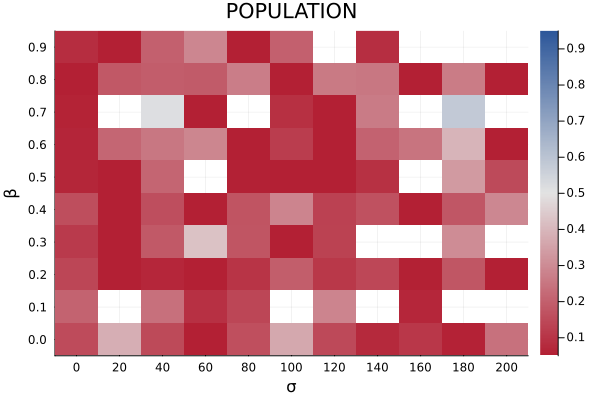

In [4]:
key_index = [1:10; 14:15]

for df in groupby(df, names(df)[key_index])
    title = join(["$(k) = $(v)" for (k, v) in pairs(df[1, key_index])], ", ")
    print(title)
    
    if df.variability_mode[1] == "POPULATION"
        xlims = (-10, 210)
        xticks = 0:20:200
    elseif df.variability_mode[1] == "PAYOFF"
        xlims = (-0.025, 0.525)
        xticks = 0:0.05:0.5
    elseif df.variability_mode[1] ∈ ["STRATEGY_MUTATION", "RELATIONSHIP_MUTATION"]
        xlims = (-0.0025, 0.0525)
        xticks = 0:0.005:0.05
    end
    
    p = plot_σβ_heatmap(df, String(df.variability_mode[1]), xlims, xticks)
    display(p)
end